# Prepare scVelo Input File

Combine loom file with splice data and seurat output converted into anndata.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy as sc
import igraph
import scvelo as scv
import loompy as lmp
import anndata

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set parameters for plots, including size, color, etc.
scv.set_figure_params(style="scvelo")
pl.rcParams["figure.figsize"] = (10,10)
Colorss=["#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF"]

### Import the filtered gene expression matrix output from Cell Ranger into scVelo.

In [3]:
# Define Path to the matrix output from cellranger
Path10x='./sample1_filtered_feature_bc_matrix/'

# Read matrix
matrix = sc.read_10x_mtx(Path10x,var_names='gene_symbols',cache=True)

# Print information on this new object
matrix

AnnData object with n_obs × n_vars = 10254 × 36601
    var: 'gene_ids', 'feature_types'

### Import spliced/unspliced counts.

In [4]:
# Read velocyto output
spliced = scv.read('sample_alignments_ZIY3A.loom', cache=True)

# Merge velocyto with cellranger matrix
spliced = scv.utils.merge(matrix, spliced)

spliced

AnnData object with n_obs × n_vars = 10254 × 31915
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
spliced.write('1-spliced.h5ad')

### Import clusters and UMAP projection.

In [6]:
#read in Seurat output
adata = scv.read('sample1.h5ad', cache=True)

#merge Seurat output with the spliced data
final = scv.utils.merge(spliced, adata)

In [7]:
#check the fial anndata object contains all info needed - spliced and unspliced layers, gen_ids, X_umap and PCs
final

AnnData object with n_obs × n_vars = 8393 × 18111
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.1.1', 'seurat_clusters', 'RNA_snn_res.0.9', 'RNA_snn_res.0.8', 'RNA_snn_res.0.7', 'pANN_0.25_0.09_651', 'DF.classifications_0.25_0.09_651'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

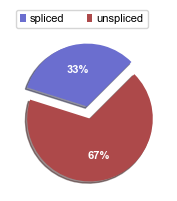

In [8]:
scv.pl.proportions(final)

### Save final Anndata object for input into scVelo

In [9]:
final.write('sample1-scVelo-input.h5ad')